In [1]:
import numpy as np
import math as mth
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import sklearn.svm as sv
import sklearn.metrics as met
import scipy.stats as stt

In [2]:
N = 4000
Min = -1
Max = +1
x = np.zeros((N, 3))
y = np.zeros((N, 1))

In [3]:
for i in range(0, N):
    x[i, 0] = np.random.uniform(Min, Max)
    x[i, 1] = np.random.uniform(Min, Max)
    x[i, 2] = np.random.uniform(Min, Max)
    y[i, 0] = mth.sin(x[i, 0]) + 1.2 * x[i, 1] - 1.3 * x[i, 2] ** 2 + 1 + np.random.randn()/90

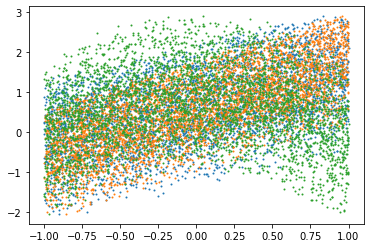

In [14]:
for i in range (0, 3):
    plt.scatter(x[:, i], y[:, 0], s = 1)

In [15]:
Xtr, Xte, Ytr, Yte = ms.train_test_split(x, y, train_size = 0.7, random_state = 35)

In [16]:
svm = sv.SVR( kernel = "rbf", degree = 3, max_iter = 1000)
svm.fit(Xtr, Ytr.ravel())

SVR(max_iter=1000)

In [17]:
trPred = svm.predict(Xtr)
tePred = svm.predict(Xte)

In [18]:
trMSE = met.mean_squared_error(Ytr, trPred)
teMSE = met.mean_squared_error(Yte, tePred)

In [19]:
trPCC = stt.pearsonr(Ytr[:, 0], trPred)
tePCC = stt.pearsonr(Ytr[:, 0], trPred)
print("Train MSE : ", trMSE)
print("Test MSE : ", teMSE)
print("Train PCC : ", trPCC)
print("Test PCC : ", tePCC)

Train MSE :  0.0027647302070598016
Test MSE :  0.0025976726607749184
Train PCC :  (0.9984443653695343, 0.0)
Test PCC :  (0.9984443653695343, 0.0)


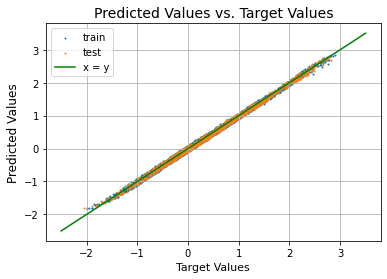

In [20]:
plt.scatter(Ytr[:, 0], trPred, label = "train", s = 1)
plt.scatter(Yte[:, 0], tePred, label = "test", s = 1)
plt.plot([-2.5, 3.5], [-2.5, 3.5], label = "x = y" , c = "g")
plt.xlabel("Target Values", fontsize = 11)
plt.ylabel("Predicted Values", fontsize = 12)
plt.title('Predicted Values vs. Target Values', fontsize = 14)
plt.legend()
plt.grid()